# Currency correlation and plotting

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf
import scipy.stats as stats

### Setting parameters / defaults
sns.set(rc = {'figure.figsize': (10,8)})
custom_color = (0.4,0.4,0.6,0.5)


<IPython.core.display.Javascript object>

### Data preperation

In [105]:
### Getting currency

df_curr = pd.read_excel('currency.xlsx', index_col='Date')
df_curr.index = pd.to_datetime(df_curr.index)
df_curr = df_curr.pct_change()[1:]
df_curr.head()

,AUD,BDT,BGN,BRL,BYN,CAD,CHF,CNY,CZK,DKK,EUR,GBP,HKD,HRK,HUF,I44,IDR,ILS,INR,ISK,JPY,KRW,MMK,MXN,MYR,NZD,PHP,PKR,PLN,RON,RUB,SEK,SGD,THB,TRY,TWD,TWI,USD,VND,XDR,ZAR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-10,0.007002,NaN,-0.000179,0.019194,NaN,0.004785,0.000048,-0.006193,0.001079,-0.000194,-0.000196,-0.005273,-0.006583,-0.000098,0.009305,-0.000450,-0.006874,-0.002299,0.007157,NaN,-0.005471,-0.000965,NaN,0.006167,0.000052,0.007457,-0.001616,-0.003742,0.004156,-0.001536,0.005891,0.002423,0.000173,-0.001743,-0.003425,-0.001104,-0.000638,-0.006450,NaN,-0.006413,0.003116
2012-01-11,0.000792,NaN,-0.000664,0.003399,NaN,0.006548,0.000666,0.006232,-0.002055,-0.000777,-0.000653,0.002131,0.006237,-0.001476,0.000530,0.001464,0.005558,0.001024,0.005026,NaN,0.004652,0.000386,NaN,-0.000227,0.004141,0.004458,0.007506,0.004207,-0.000291,-0.001766,0.000633,-0.000345,0.003299,0.000423,0.009905,0.008291,0.000638,0.006425,NaN,0.003878,-0.001351
2012-01-12,0.008192,NaN,0.003451,0.009714,NaN,0.002062,0.004119,0.001470,0.012893,0.003402,0.003464,-0.002148,0.002066,0.002661,0.016676,0.002924,0.000716,0.004348,0.008795,NaN,0.002955,0.007722,NaN,0.007720,0.002088,0.005401,-0.000073,0.000898,0.008397,0.007592,0.004587,-0.001382,0.003460,0.002698,0.008849,0.002143,0.002232,0.002045,NaN,0.003514,0.011902
2012-01-13,-0.002853,NaN,0.002089,0.004513,NaN,-0.003524,0.003092,-0.000210,0.007231,0.002131,0.002084,-0.001104,-0.000644,0.001671,-0.003850,0.000673,0.000487,0.000891,0.000769,NaN,0.000651,0.004981,NaN,0.002028,0.001719,-0.004456,0.005186,-0.002840,0.009599,0.005438,-0.003149,-0.002191,0.000450,0.000264,-0.002024,-0.000597,0.000954,-0.000664,NaN,0.000036,0.001470
2012-01-16,0.003166,NaN,-0.002924,0.003311,NaN,0.004011,-0.002359,0.004822,-0.008568,-0.002707,-0.002925,0.003996,0.004900,-0.003336,-0.003019,0.000224,0.000913,-0.000064,0.005551,NaN,0.005379,0.001716,NaN,0.004947,0.002860,0.003827,0.004142,0.006896,0.000115,0.001803,0.004265,-0.001271,0.004324,0.001318,0.003841,0.002588,-0.000636,0.005096,NaN,0.001588,-0.001335


In [143]:
### Getting stock prices and type of currency

start_date = '2020-01-01'
end_date = df_curr.index[-1]

# Define ticker
t = yf.Ticker('WCH.DE')
name = t.info['longName']
close_price = t.history(start=start_date, end=end_date)['Close']
returns = close_price.pct_change()

# Get the type of currency
currency = t.info['currency']

In [144]:
### Merging Close price and currency on common index (as there seems to be some datapoints missing in df_curr)

df = pd.merge(returns, df_curr[currency], left_index=True, right_index=True)[1:]
df.columns = ['Return', currency]
df

,Return,EUR
Date,,
2020-01-03,-0.023705,-0.000945
2020-01-06,-0.022482,0.001760
2020-01-07,-0.004293,0.000609
2020-01-08,0.016631,-0.000406
2020-01-09,-0.017873,0.001594
...,...,...
2021-12-29,0.001517,0.001554
2021-12-30,-0.003030,-0.001802
2022-01-03,0.015957,0.001251


### Plotting
By changing the ticker, this plot will show the result of a regression of the companys return over the currency returns. The currency of choice is the traded currency of the company.

In [145]:
### calculating correlation, here pearson correlation coefficient and p-value
r, p = stats.pearsonr(df[currency], df['Return'])
print(r, p)

-0.41600680697608794 1.3509141448903275e-22


<IPython.core.display.Javascript object>

Pearson correlation between Wacker Chemie AG and EUR: -0.416


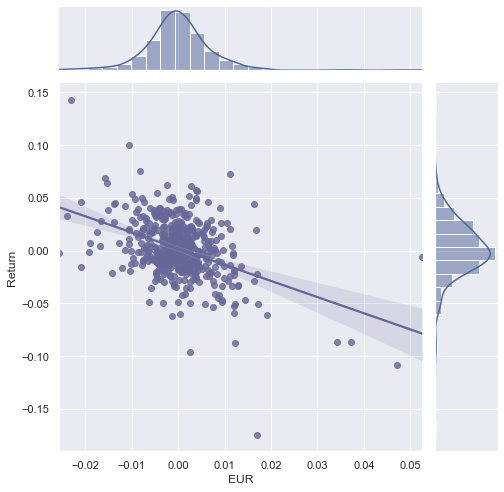

In [179]:
### Seaborn jointplot

marginal_kws = {'bins': 25,
                'fill': True,
                'color': (0.3,0.4,0.6,0.5)}

sns.jointplot(data       = df,
              x          = currency,
              y          = 'Return',
              kind       = 'reg',
              marginal_kws = marginal_kws,
              marker     = 'o',
#              ci         = None,
              order      = 1,
              height     = 7,
              ratio      = 5,
              color      = custom_color,
              marginal_ticks = False);


print(f'Pearson correlation between {name} and {currency}: {r:.3f}')

<IPython.core.display.Javascript object>

Pearson correlation between Wacker Chemie AG and EUR: -0.416


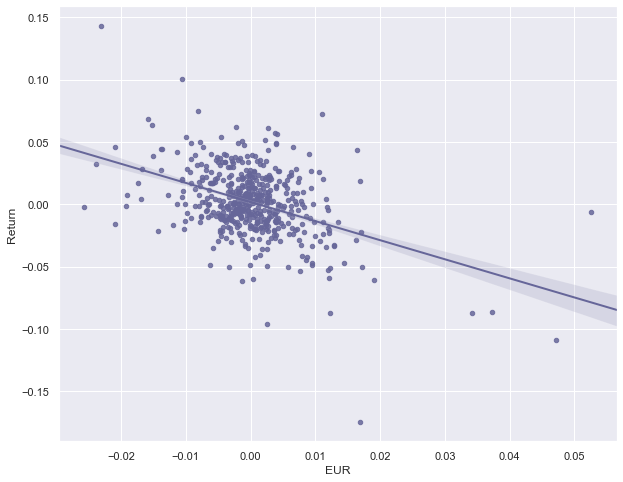

In [181]:
### Seaborn regplot

scatter_ = {'s': 20,
            'alpha': 0.85}

line_ = {'lw': 2,
         'color': custom_color,
         'alpha': 1,
         }

sns.regplot(data     = df,
            x        = currency, 
            y        = 'Return',
            color    = custom_color,
            marker   = 'o',
            ci       = 68,        # Confidence interval
            truncate = False,     # Extending the regression line to the axis limits
  #          x_jitter = .1,
            fit_reg =  True,
            scatter_kws = scatter_,
            line_kws = line_
           );

print(f'Pearson correlation between {name} and {currency}: {r:.3f}')